In [59]:
# imports 
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math

In [60]:
# enter your file name
filepath=r'C:\Users\SUBHADEEP\Documents\GitHub\Face-Recognition-ML\images\SundarPichai\4.jpg'

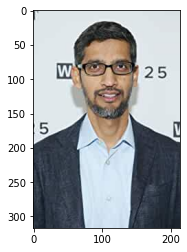

In [61]:
# import image
img = plt.imread(filepath)
plt.imshow(img)
plt.show()

In [62]:
face_detector = MTCNN()

In [63]:
# draw an image with detected objects
def draw_facebox_and_keypoints(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
            # show the plot
    plt.show()

In [64]:
results = face_detector.detect_faces(img)

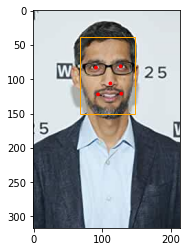

In [65]:
# enter your file name
draw_facebox_and_keypoints(filepath, results)

## Another Way

In [66]:
src = np.array([
       [  54.70657349,   73.85186005],
       [ 105.04542542,   73.57342529],
       [  80.03600311,  102.48085785],
       [  59.35614395,  131.95071411],
       [ 101.04272461,  131.72013855]], dtype=np.float32)

landmark = np.array([results[0]['keypoints']['left_eye'],\
            results[0]['keypoints']['right_eye'],\
            results[0]['keypoints']['nose'],\
            results[0]['keypoints']['mouth_left'],\
            results[0]['keypoints']['mouth_right']])

In [67]:
from skimage import transform as trans

dst = landmark.astype(np.float32)
tform = trans.SimilarityTransform()
tform.estimate(dst, src)
M = tform.params[0:2,:]
M

array([[ 1.39149682e+00, -5.88020081e-02, -6.75507960e+01],
       [ 5.88020081e-02,  1.39149682e+00, -4.65439048e+01]])

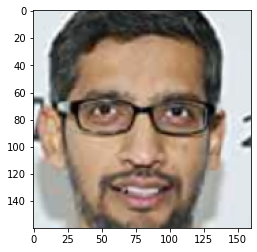

In [68]:
import cv2
wrapped = cv2.warpAffine(img,M,(160,160), borderValue = 0.0)
plt.imshow(wrapped)
plt.show()